In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

**Importing the dataset**

In [2]:
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
X = df[['Age','EstimatedSalary']]# Only these two features have been taken for modelling as per the instructions in the assignment pblm statement
Y = df['Purchased']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=5, stratify=Y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 2) (80, 2) (320,) (80,)


**Feature Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
func = StandardScaler()
func.fit(x_train)
x_train_std = func.transform(x_train)
x_test_std = func.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [7]:
model = DecisionTreeClassifier()
model.fit(x_train_std,y_train)
model.score(x_test_std,y_test)

0.8375

**Predicting the Test set results**

In [8]:
y_pred = model.predict(x_test_std)

**Making the Confusion Matrix**

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

**Visualising the Training set results**

Text(0.5, 0, 'Purchased')

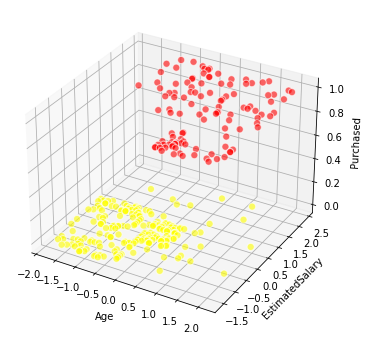

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = x_train_std[:,0]
ys = x_train_std[:,1]
zs = y_train
ax.scatter(xs, ys, zs, s=50,color=['red' if p==1 else 'yellow' for p in model.predict(x_train_std)], alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')

**Visualising the Test set results**

Text(0.5, 0, 'Purchased')

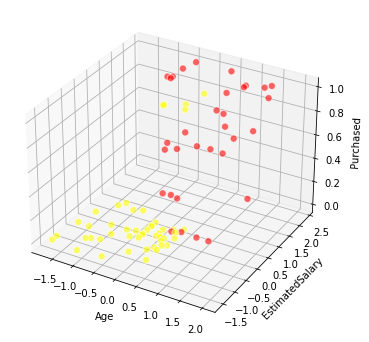

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = x_test_std[:,0]
ys = x_test_std[:,1]
zs = y_test
ax.scatter(xs, ys, zs, s=50,color=['red' if p==1 else 'yellow' for p in y_pred], alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')